# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
#Filtrando a Categoria á ser analisada
df_dsa_p1 = df_dsa[df_dsa['Categoria'] == 'Office Supplies']

In [14]:
#Agrupando por cidade
df_dsa_p1_total = df_dsa_p1.groupby('Cidade')['Valor_Venda'].sum()

In [15]:
#Buscando a cidade com maior venda
cidade_maior_venda = df_dsa_p1_total.idxmax()
print("A Cidade com maior venda para 'Office Supplies' é: ", cidade_maior_venda)

A Cidade com maior venda para 'Office Supplies' é:  New York City


In [16]:
#Conferindo resultado
df_dsa_p1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [17]:
df_dsa_p2 = df_dsa.groupby('Data_Pedido')["Valor_Venda"].sum()

In [18]:
df_dsa_p2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

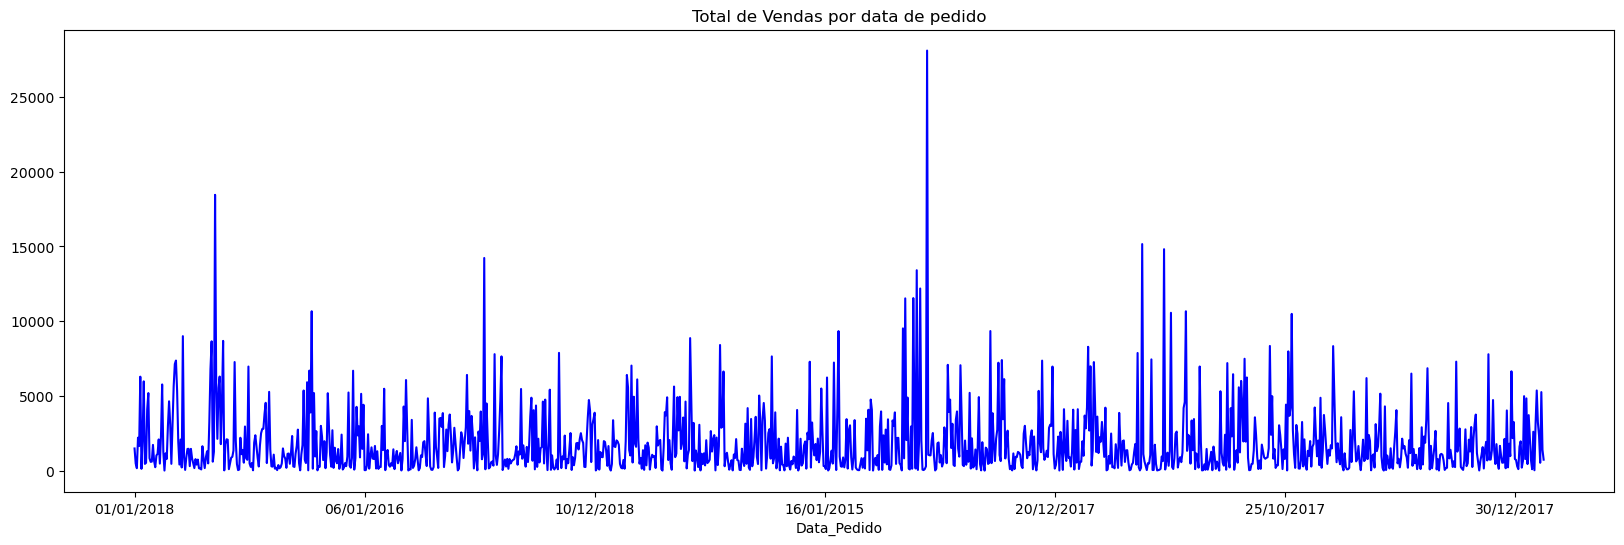

In [19]:
#Plot
plt.figure(figsize = (20,6))
df_dsa_p2.plot(x= 'Data_Pedido', y= "Valor_Venda", color = 'blue')
plt.title("Total de Vendas por data de pedido")
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [20]:
#Agrupamento por estado
df_dsa_p3 = df_dsa.groupby("Estado")["Valor_Venda"].sum().reset_index()

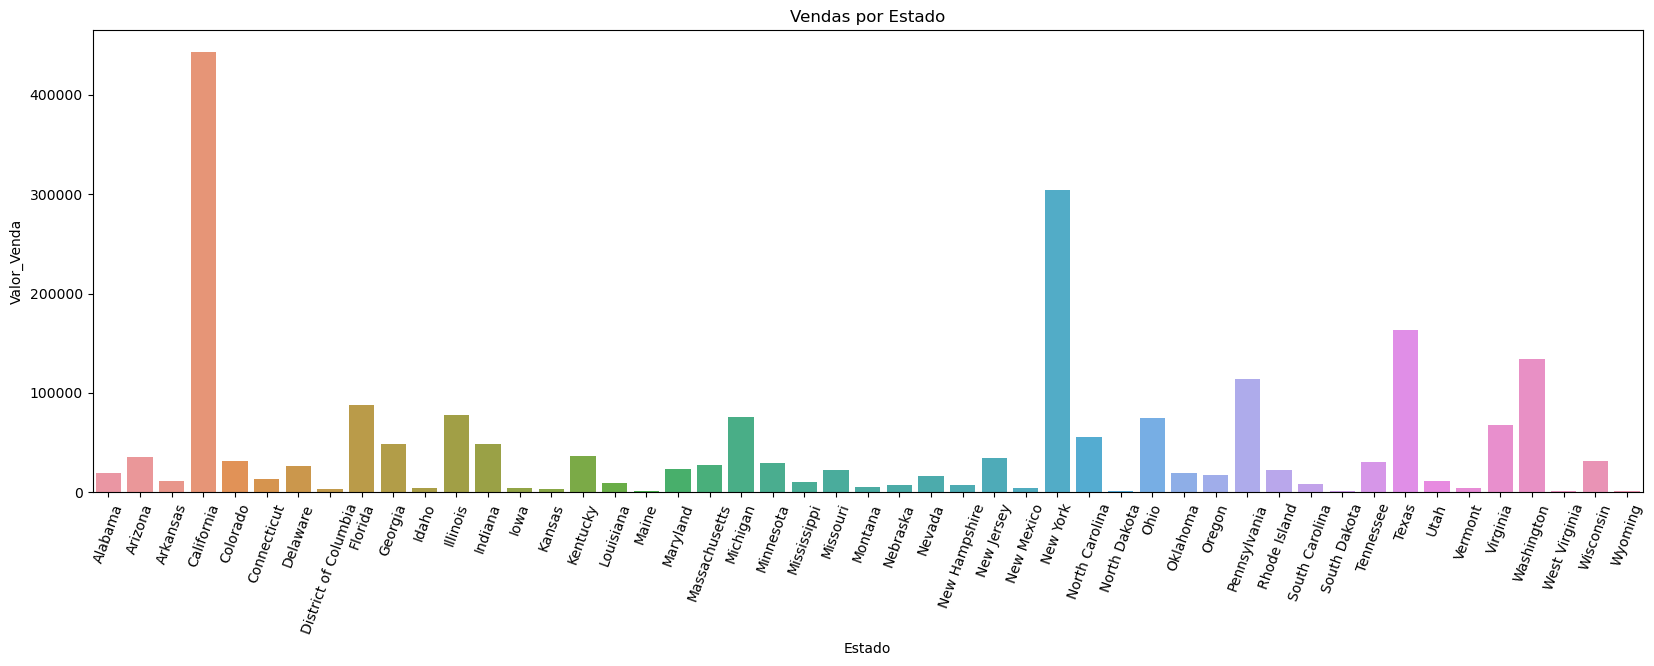

In [21]:
plt.figure(figsize = (20,6))
sns.barplot(data = df_dsa_p3,
           x = "Estado",
           y = 'Valor_Venda').set(title = "Vendas por Estado")
plt.xticks(rotation = 70)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [22]:
df_dsa_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = "Valor_Venda",
                                                                                   ascending = False).head(10)

In [23]:
df_dsa_p4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


[Text(0.5, 1.0, 'As 10 Cidades com maior Venda')]

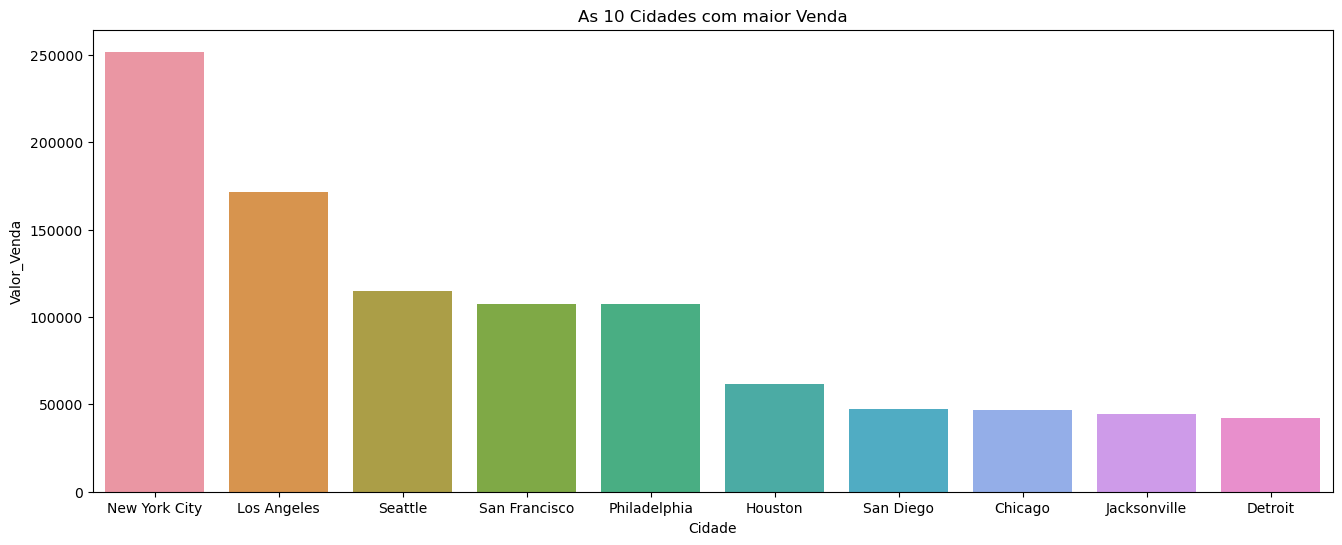

In [24]:
plt.figure(figsize = (16,6))
sns.set_palette('coolwarm')
sns.barplot(data = df_dsa_p4,
           x = "Cidade",
           y = 'Valor_Venda').set(title = 'As 10 Cidades com maior Venda')

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [25]:
df_dsa_p5 = df_dsa.groupby("Segmento")['Valor_Venda'].sum().reset_index().sort_values(by = "Valor_Venda",
                                                                                      ascending = False)

In [26]:
df_dsa_p5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [27]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '$ {v:d}'.format(v = val)
    return my_format

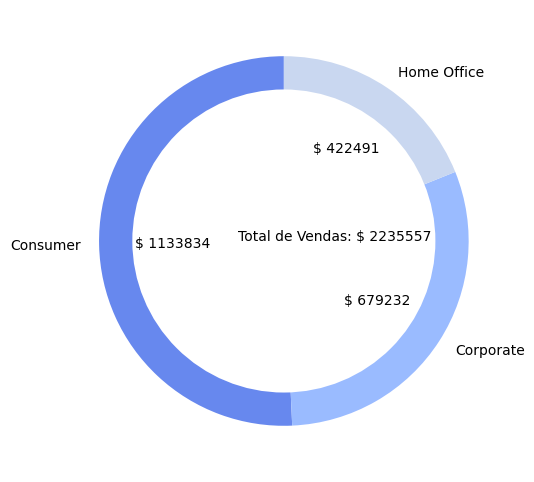

In [28]:
plt.figure(figsize = (16,6))

plt.pie(df_dsa_p5["Valor_Venda"],
        labels = df_dsa_p5['Segmento'],
        autopct = autopct_format(df_dsa_p5["Valor_Venda"]),
        startangle = 90)

centre_circle = plt.Circle((0,0), 0.82, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.annotate(text = 'Total de Vendas: ' + '$ '+str(int(sum(df_dsa_p5['Valor_Venda']))),xy = (-0.25,0))
plt.show()

## Pergunta de Negócio 6 :

### Qual o Total de Vendas Por Segmento e Por Ano?

In [29]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [30]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

In [31]:
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [32]:
df_dsa["Ano"] = df_dsa ['Data_Pedido'].dt.year

In [33]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [34]:
df_dsa_p6 = df_dsa.groupby(["Ano","Segmento"])["Valor_Venda"].sum()

In [35]:
df_dsa_p6

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 :

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [36]:
df_dsa['Desconto']= np.where(df_dsa["Valor_Venda"] > 1000, 0.15, 0.10)

In [37]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [38]:
df_dsa["Desconto"].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

## Pergunta de Negócio 8 :

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [39]:
df_dsa["Valor_Venda_Desconto"] = df_dsa["Valor_Venda"] - (df_dsa["Valor_Venda"] * df_dsa["Desconto"])

In [40]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [41]:
df_dsa_p8_venda_sem_desconto = df_dsa.loc[df_dsa["Desconto"] == 0.15, "Valor_Venda"]

In [42]:
df_dsa_p8_venda_apos_desconto = df_dsa.loc[df_dsa["Desconto"] == 0.15, "Valor_Venda_Desconto"]

In [43]:
media_vendas_sem_desconto = df_dsa_p8_venda_sem_desconto.mean()

In [44]:
media_vendas_apos_desconto = df_dsa_p8_venda_apos_desconto.mean()

In [45]:
print('A media das vendas antes do desconto de 15% é: ', round(media_vendas_sem_desconto, 2))
print('A media das vendas após o desconto de 15% é: ', round(media_vendas_apos_desconto, 2))

A media das vendas antes do desconto de 15% é:  2116.81
A media das vendas após o desconto de 15% é:  1799.29


## Pergunta de Negócio 9:

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [46]:
df_dsa['Mes'] = df_dsa["Data_Pedido"].dt.month

In [47]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [48]:
df_dsa_p9 = df_dsa.groupby(["Ano","Mes",'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [49]:
df_dsa_p9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [50]:
anos = df_dsa_p9.index.get_level_values(0)
meses = df_dsa_p9.index.get_level_values(1)
segmentos = df_dsa_p9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

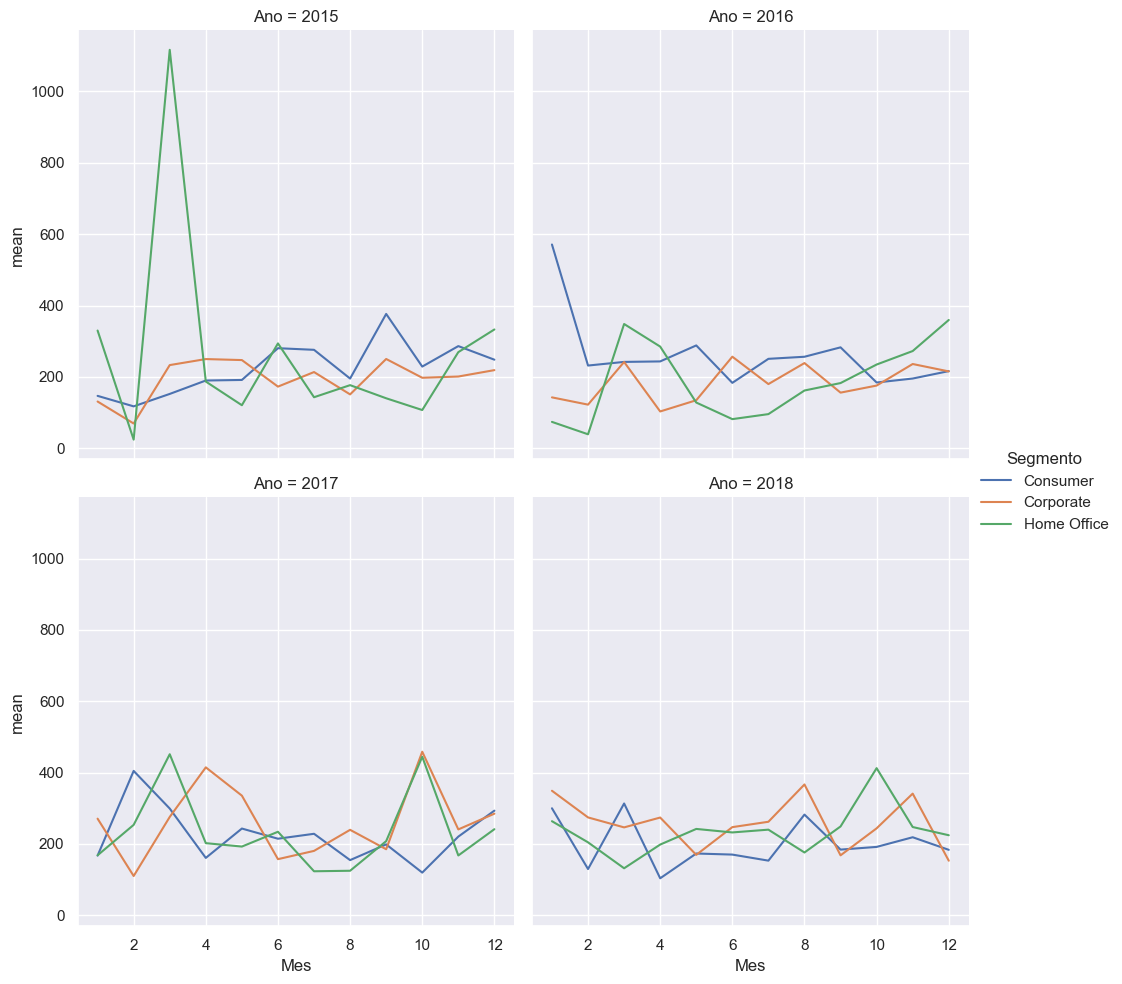

In [51]:
plt.figure(figsize = (12,6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_dsa_p9,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 2)
plt.show()

## Pergunta de Negócio 10 :

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [52]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [53]:
df_dsa_p10 = df_dsa.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [54]:
df_dsa_p10 = df_dsa_p10 [['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [55]:
df_dsa_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [56]:
df_dsa_p10_cat = df_dsa_p10.groupby('Categoria').sum(numeric_only = True).reset_index()

In [57]:
df_dsa_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [58]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [59]:
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

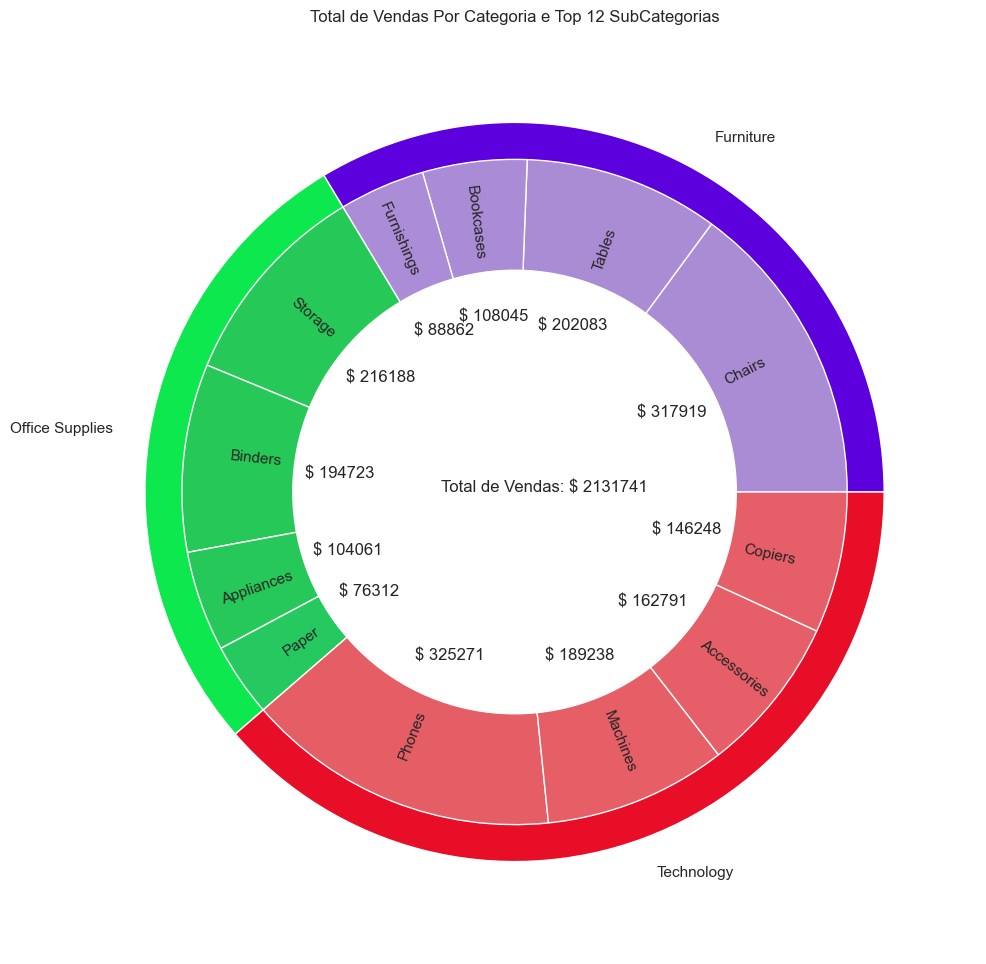

In [60]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_dsa_p10_cat['Valor_Venda'], 
            radius = 1,
            labels = df_dsa_p10_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_dsa_p10['Valor_Venda'],
            radius = 0.9,
            labels = df_dsa_p10['SubCategoria'],
            autopct = autopct_format(df_dsa_p10['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_dsa_p10['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim